<a href="https://colab.research.google.com/github/rohitmanral/TaxiCab_Analysis/blob/main/TaxiCab_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Data Loading**

## 1) Trip Data

In [3]:
# import required modules
import pandas as pd
import numpy as np
import time
  
# time taken to read data
s_time_chunk = time.time()
chunk = pd.read_csv('/content/drive/My Drive/raw_data/yellow_tripdata_2021-01_raw_updated.csv', chunksize=1000)
e_time_chunk = time.time()
  
print("Time to read this CSV file with chunks: ", (e_time_chunk-s_time_chunk), "sec")
df = pd.concat(chunk)
  
# data
df.sample(10)

Time to read this CSV file with chunks:  0.2785956859588623 sec


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId
43061,2.0,2021-01-02 16:13:07,2021-01-02 16:17:54,6.0,0.88,1.0,N,151,238,2.0,5.5,0.0,0.5,0.00,0.0,248333882666
120207,2.0,2021-01-04 22:54:21,2021-01-04 23:17:06,1.0,7.45,1.0,N,186,40,1.0,25.0,0.5,0.5,2.00,0.0,386935813648
597584,2.0,2021-01-15 20:16:56,2021-01-15 20:23:14,1.0,1.26,1.0,N,113,137,2.0,6.5,0.5,0.5,0.00,0.0,127671280491
110070,1.0,2021-01-04 17:16:33,2021-01-04 17:33:35,1.0,3.5,1.0,N,140,186,1.0,14.5,3.5,0.5,3.75,0.0,142164766232
258046,1.0,2021-01-08 07:53:23,2021-01-08 08:14:15,1.0,3.9,1.0,N,140,90,1.0,16.5,2.5,0.5,2.00,0.0,774876004830
424400,2.0,2021-01-12 11:36:44,2021-01-12 11:43:24,1.0,0.83,1.0,N,113,4,1.0,6.0,0.0,0.5,2.32,0.0,516757494207
890275,2.0,2021-01-22 20:38:43,2021-01-22 20:46:05,1.0,1.41,1.0,N,236,43,2.0,7.5,0.5,0.5,0.00,0.0,286730080195
136760,1.0,2021-01-05 12:27:18,2021-01-05 12:32:44,1.0,0.9,1.0,N,161,233,1.0,5.5,2.5,0.5,1.75,0.0,140791429199
999967,1.0,2021-01-25 17:17:16,2021-01-25 17:28:59,2.0,2.4,1.0,Y,230,107,1.0,10.5,3.5,0.5,2.95,0.0,161113752088
1211723,2.0,2021-01-30 10:10:59,2021-01-30 10:32:24,1.0,4.4,1.0,N,148,52,1.0,18.0,0.0,0.5,4.26,0.0,594054856190


In [4]:
df.shape

(1369765, 16)

## 1) Surcharge Data

In [5]:
import json 
with open('/content/drive/My Drive/raw_data/surcharge_data.json', 'r') as f:
    for line in f:
        data = json.loads(line)
data

{'559893529209': {'improvement_surcharge': 0.3, 'congestion_surcharge': 2.5},
 '993405808080': {'improvement_surcharge': 0.3, 'congestion_surcharge': 0.0},
 '267031741304': {'improvement_surcharge': 0.3, 'congestion_surcharge': 0.0},
 '355132875433': {'improvement_surcharge': 0.3, 'congestion_surcharge': 0.0},
 '603494714228': {'improvement_surcharge': 0.3, 'congestion_surcharge': 2.5},
 '796431455521': {'improvement_surcharge': 0.3, 'congestion_surcharge': 2.5},
 '292429735915': {'improvement_surcharge': 0.3, 'congestion_surcharge': 0.0},
 '723218812491': {'improvement_surcharge': 0.3, 'congestion_surcharge': 2.5},
 '707163995392': {'improvement_surcharge': 0.3, 'congestion_surcharge': 0.0},
 '762316622020': {'improvement_surcharge': 0.3, 'congestion_surcharge': 2.5},
 '410196195773': {'improvement_surcharge': 0.3, 'congestion_surcharge': 2.5},
 '102898637308': {'improvement_surcharge': 0.3, 'congestion_surcharge': 0.0},
 '831176309868': {'improvement_surcharge': 0.3, 'congestion_surc

In [6]:
type(data)

dict

Now, converting the dictionary to a dataframe

In [7]:
df_surcharge= pd.DataFrame.from_dict(data, orient='index')
df_surcharge.sample(10)

,improvement_surcharge,congestion_surcharge
373643466094,0.3,2.5
441641712350,0.3,2.5
656891143270,0.3,2.5
718742795092,0.3,2.5
240303490825,0.3,2.5
251881976442,0.3,0.0
612812162015,0.3,0.0
747480977273,0.3,2.5
508171141751,0.3,2.5
547359735388,0.3,2.5


In [8]:
df_surcharge.shape

(1369765, 2)

In [9]:
df_surcharge['tripId'] = df_surcharge.index
df_surcharge.sample(10)

,improvement_surcharge,congestion_surcharge,tripId
828172103654,0.3,2.5,828172103654
674666356935,0.3,2.5,674666356935
694975821720,0.3,2.5,694975821720
664739672915,0.3,2.5,664739672915
952808856627,0.3,2.5,952808856627
787391401193,0.3,2.5,787391401193
878761088745,0.3,2.5,878761088745
707852884576,0.3,2.5,707852884576
757102595285,0.3,0.0,757102595285
823594930944,0.3,2.5,823594930944


#### Lets's merge the 2 dataframes now.

In [10]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'tripId'],
      dtype='object')

In [11]:
df_surcharge.columns

Index(['improvement_surcharge', 'congestion_surcharge', 'tripId'], dtype='object')

See the type of TRIP ID in both dataframes

In [12]:
type(df['tripId'][0])

numpy.int64

In [13]:
type(df_surcharge['tripId'][0])

str

In [14]:
df_surcharge = df_surcharge.astype({'tripId':'int'})
type(df_surcharge['tripId'][0])

numpy.int64

In [15]:
df= df.merge(df_surcharge[['tripId','improvement_surcharge', 'congestion_surcharge']])
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId,improvement_surcharge,congestion_surcharge
422556,1.0,2021-01-12 10:36:49,2021-01-12 10:43:45,1.0,1.1,1.0,N,237,237,2.0,6.50,2.5,0.5,0.00,0.0,279033058808,0.3,2.5
170433,2.0,2021-01-06 09:27:27,2021-01-06 09:33:30,1.0,0.85,1.0,N,236,75,1.0,6.00,0.0,0.5,2.79,0.0,489184549508,0.3,2.5
58929,2.0,2021-01-03 10:44:31,2021-01-03 10:48:26,1.0,1.11,1.0,N,237,161,1.0,5.50,0.0,0.5,1.76,0.0,494209468162,0.3,2.5
92947,2.0,2021-01-04 11:32:03,2021-01-04 12:02:35,2.0,15.47,1.0,N,132,89,2.0,44.00,0.0,0.5,0.00,0.0,336875059819,0.3,0.0
1136815,2.0,2021-01-28 16:01:33,2021-01-28 16:13:47,1.0,2.81,1.0,N,237,233,1.0,11.50,0.0,0.5,4.44,0.0,284654349783,0.3,2.5
1142541,1.0,2021-01-28 18:27:37,2021-01-28 18:33:06,0.0,0.9,1.0,N,237,162,1.0,5.50,3.5,0.5,2.90,0.0,437192706483,0.3,2.5
874963,1.0,2021-01-22 15:47:13,2021-01-22 16:03:34,1.0,3.2,1.0,N,141,151,1.0,13.50,2.5,0.5,3.35,0.0,679218669050,0.3,2.5
1309813,3.0,2021-01-16 15:14:00,2021-01-16 15:18:00,NaN,0.27,NaN,NaN,116,116,6.0,11.45,0.0,0.5,2.75,0.0,852858107019,0.3,0.0
974236,2.0,2021-01-25 09:03:27,2021-01-25 09:27:20,1.0,2.76,1.0,N,236,233,1.0,16.00,0.0,0.5,0.00,0.0,683439075382,0.3,2.5
846686,2.0,2021-01-22 03:34:41,2021-01-22 03:51:50,4.0,7.25,1.0,N,163,69,1.0,22.00,0.5,0.5,0.00,0.0,942891348199,0.3,2.5


In [72]:
df.shape

(1369765, 18)

# **Data Cleaning**   


*   Check for nan (missing values) and remove those records  
*   Fix wrong formatted values  
*   Splitting the Date-Time columns i.e. `tpep_pickup_datetime` & `tpep_dropoff_datetime`.  
*   Change the numerical categorical values in `VendorID`, `RatecodeID`, `store_and_fwd_flag`, & `payment_type` to their actual string values.  
*   Remove anomalies/ outliers  




### 1) Check for NAN values & fixing them

In [18]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'tripId',
       'improvement_surcharge', 'congestion_surcharge'],
      dtype='object')

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369765 entries, 0 to 1369764
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1369765 non-null  float64
 1   tpep_pickup_datetime   1369765 non-null  object 
 2   tpep_dropoff_datetime  1369765 non-null  object 
 3   passenger_count        1271413 non-null  float64
 4   trip_distance          1369765 non-null  object 
 5   RatecodeID             1271413 non-null  float64
 6   store_and_fwd_flag     1271413 non-null  object 
 7   PULocationID           1369765 non-null  int64  
 8   DOLocationID           1369765 non-null  int64  
 9   payment_type           1369765 non-null  float64
 10  fare_amount            1369765 non-null  float64
 11  extra                  1369765 non-null  float64
 12  mta_tax                1369765 non-null  float64
 13  tip_amount             1369765 non-null  float64
 14  tolls_amount      

In [ ]:
#summary statistics
df.describe() #just for numerical attributes/ columns

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId,improvement_surcharge,congestion_surcharge
count,1.369765e+06,1.271413e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06
mean,1.843999e+00,1.411508e+00,1.035081e+00,1.652472e+02,1.614956e+02,1.583443e+00,1.209662e+01,9.705085e-01,4.930411e-01,1.918099e+00,2.477432e-01,5.505093e+11,2.969412e-01,2.116098e+00
std,7.822027e-01,1.059833e+00,5.994840e-01,6.783849e+01,7.210800e+01,1.195230e+00,1.291338e+01,1.231256e+00,7.632070e-02,2.597153e+00,1.672755e+00,2.597719e+11,4.222174e-02,9.287277e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,1.000005e+11,-3.000000e-01,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.240000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.256927e+11,3.000000e-01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.860000e+00,0.000000e+00,5.506215e+11,3.000000e-01,2.500000e+00
75%,2.000000e+00,1.000000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,7.756135e+11,3.000000e-01,2.500000e+00
max,5.000000e+00,8.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,6.000000e+00,6.960500e+03,8.250000e+00,5.000000e-01,1.140440e+03,8.117500e+02,9.999999e+11,3.000000e-01,3.000000e+00


<Axes: >

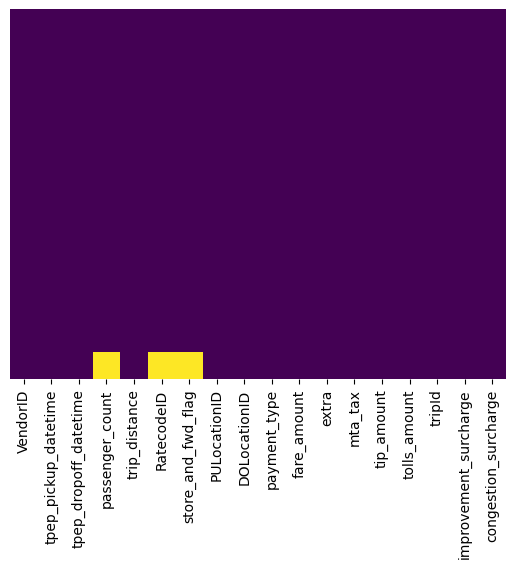

In [ ]:
#checking null values

import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As the above chart shows, we got some NAN values in `passenger_count`, `RatecodeID`, and `store_and_fwd_flag`.

In [73]:
df['passenger_count'].count()

1271413

In [21]:
df['passenger_count'].unique()

array([ 1.,  0.,  2.,  3.,  5.,  4.,  6.,  8.,  7., nan])

In [22]:
df['RatecodeID'].count()

1271413

In [23]:
df['RatecodeID'].unique()

array([ 1.,  2.,  4.,  5.,  3., 99.,  6., nan])

In [74]:
df['store_and_fwd_flag'].count()

1271413

In [25]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y', nan], dtype=object)

In [26]:
df.loc[(df.payment_type == 1.), 'payment_type'] = 'Credit card'
df.loc[(df.payment_type == 2.), 'payment_type'] = 'Cash'
df.loc[(df.payment_type == 3.), 'payment_type'] = 'No charge'
df.loc[(df.payment_type == 4.), 'payment_type'] = 'Dispute'
df.loc[(df.payment_type == 5.), 'payment_type'] = 'Unknown'
df.loc[(df.payment_type == 6.), 'payment_type'] = 'Voided trip'
df['payment_type'].unique()

array(['Cash', 'Credit card', 'Dispute', 'No charge', 'Unknown',
       'Voided trip'], dtype=object)

### Bar chart of `payment_type` before removing the NAN values

Credit card    934473
Cash           322889
Unknown         49238
Voided trip     49114
No charge        8384
Dispute          5667
Name: payment_type, dtype: int64


Text(0, 0.5, 'Trips count')

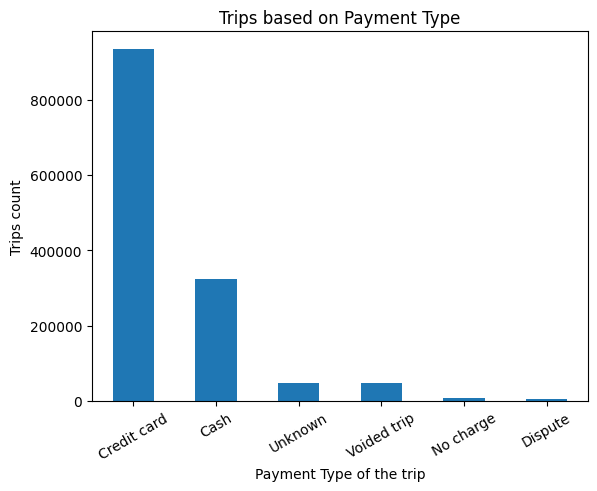

In [ ]:
xy= df['payment_type'].value_counts()
print(xy)

xy.plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Trips based on Payment Type")
plt.xlabel("Payment Type of the trip")
plt.ylabel("Trips count")

###  So, we are just taking the rows where `passenger_count` is not NA and leaving the other records:  

In [27]:
df_new = df[df['passenger_count'].notna()]
df_new.shape

(1271413, 18)

In [28]:
df_new['passenger_count'].unique()

array([1., 0., 2., 3., 5., 4., 6., 8., 7.])

In [29]:
df_new['RatecodeID'].unique()

array([ 1.,  2.,  4.,  5.,  3., 99.,  6.])

In [30]:
df_new['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [31]:
df_new['payment_type'].unique()

array(['Cash', 'Credit card', 'Dispute', 'No charge'], dtype=object)

As above, we can see that `payment_type` got no more `5= Unknown` and `6= Voided Trip`. It is a good approach to get rid of both these types of `payment_type` options.

In [177]:
df_new.shape

(1271413, 18)

<Axes: >

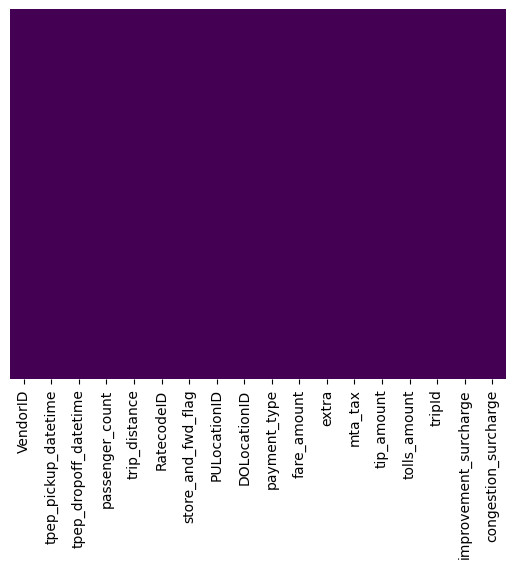

In [178]:
sns.heatmap(df_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 2) Fix wrong formatted values

* RatecodeID

In [76]:
df_new['RatecodeID'].unique()

array([ 1.,  2.,  4.,  5.,  3., 99.,  6.])

###  Now, removing all the records where `RatecodeID` is `99.`  

In [143]:
df_n = df_new[df_new.RatecodeID != 99.]
df_n.shape

(1271377, 18)

In [101]:
df_n['RatecodeID'].unique()

array([1., 2., 4., 5., 3., 6.])

Now, we got no more `99` values in `RatecodeID`.

In [36]:
df_n['VendorID'].unique()

array([1., 2.])

In [37]:
df_n['tpep_pickup_datetime'].unique()

array(['2021-01-01 00:30:10', '2021-01-01 00:51:20',
       '2021-01-01 00:43:30', ..., '2021-01-31 23:30:45',
       '2021-01-31 23:09:52', '2021-01-31 23:26:15'], dtype=object)

In [38]:
df_n['passenger_count'].unique()

array([1., 0., 2., 3., 5., 4., 6., 8., 7.])

In [39]:
df_n['RatecodeID'].unique()

array([1., 2., 4., 5., 3., 6.])

In [ ]:
df_n['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df_n['PULocationID'].unique()

array([142, 238, 132, 138,  68, 224,  95,  90,  97, 263, 164, 255,  50,
       236, 239, 151, 249, 107,  48,   4, 229, 264, 169, 137, 114, 100,
       140, 170, 186, 209, 232, 141, 113, 261, 125, 246, 158, 237,  75,
       162, 262,  79, 161, 144, 234, 231, 230,  43, 233,  74, 143,  70,
       166,  13,   7,  89,  45, 163,  91,  78, 148, 211,  87,  24, 260,
       116, 168, 207, 226, 247,  72,  61,  88, 178,  41,  17, 191,  65,
        82,  49, 173,  42, 244, 112, 127, 129, 152,  15,  80, 256,  36,
        51, 228,  69,  66, 241, 145, 181,  25, 159, 248, 179,  92, 223,
       126,  76,  37, 235, 193,   8, 106,  14, 174, 243, 136, 124, 254,
       167, 265, 197, 213, 250, 202, 123, 185, 205,  18, 227,  39, 242,
       203, 134, 216, 240, 198, 146,  35, 119,  32,  94, 259, 177,  10,
        85,  20,  62, 208, 101,  47,  33, 188,  40, 131,  81,  93, 194,
       182, 220, 135,  44, 210,   1, 171,  63,  56, 122,  19, 147, 130,
        54,  96,  29, 195,  22, 190, 149, 196, 180,  12, 175,  7

In [ ]:
df_n['payment_type'].unique()

array(['Cash', 'Credit card', 'Dispute', 'No charge'], dtype=object)

In [ ]:
df_n['fare_amount'].unique()

array([ 8.  ,  3.  , 42.  , ..., 12.53,  6.75, 26.43])

In [ ]:
df_n['extra'].unique()

array([ 3.  ,  0.5 ,  2.5 ,  0.  , -0.5 ,  3.5 ,  0.8 ,  1.  ,  4.5 ,
       -1.  ,  7.  ,  5.1 , -4.5 ,  2.  , -5.5 ,  5.5 ,  1.8 ,  2.01,
        1.3 ])

In [ ]:
df_n['mta_tax'].unique()

array([ 0.5,  0. , -0.5])

In [ ]:
df_n['tip_amount'].unique()

array([ 0.  ,  8.65,  6.05, ..., 69.06, 33.2 ,  7.64])

In [ ]:
df_n['tripId'].unique()

array([559893529209, 993405808080, 267031741304, ..., 707600771239,
       671711024112, 797365950172])

* trip_distance

In [ ]:
df_n['trip_distance'].unique()

array(['2.1', '0.2', '14.7', ..., '35.64km', '35.6km', '33.14km'],
      dtype=object)

### Also, change the format of some data like 35.64km in `trip_distance`.  
`trip_distance` column values are mix of float and string, so we will change the type of whole column to `String` first.

In [144]:
df_n['trip_distance'] = df_n['trip_distance'].astype(str) #change all the column values to string

In [145]:
len(df_n['trip_distance'])

1271377

In [146]:
trip_dist=[]

for i in df_n['trip_distance']:
  if i[-2:] == "km":
    trip_dist.append(i[:-2]) 
  else:
    trip_dist.append(i) 
    
#trip_dist

df_n['trip_distance']= trip_dist
df_n['trip_distance'].unique()

array(['2.1', '0.2', '14.7', ..., '35.64', '35.6', '33.14'], dtype=object)

In [147]:
len(trip_dist)

1271377

Now, changing the data type of `trip_distance` back to float & rounding-off to 1 decimal point.

In [148]:
df_n['trip_distance'] = pd.to_numeric(df_n['trip_distance'], downcast="float")
print(df_n['trip_distance'].dtypes)

float64


In [149]:
df_n['trip_distance'] = df_n['trip_distance'].round(1)
df_n['trip_distance'].unique()

array([2.100000e+00, 2.000000e-01, 1.470000e+01, 1.060000e+01,
       4.900000e+00, 1.600000e+00, 4.100000e+00, 5.700000e+00,
       9.100000e+00, 2.700000e+00, 6.100000e+00, 1.200000e+00,
       7.400000e+00, 1.700000e+00, 8.000000e-01, 1.000000e+00,
       7.000000e-01, 9.000000e-01, 2.200000e+00, 3.600000e+00,
       1.910000e+01, 5.400000e+00, 3.200000e+00, 4.600000e+00,
       1.430000e+01, 4.000000e+00, 6.000000e-01, 3.000000e+00,
       1.070000e+01, 2.600000e+00, 1.370000e+01, 0.000000e+00,
       2.000000e+00, 1.300000e+00, 4.800000e+00, 1.400000e+00,
       3.400000e+00, 3.800000e+00, 1.720000e+01, 3.100000e+00,
       2.800000e+00, 5.000000e-01, 4.000000e-01, 5.800000e+00,
       3.000000e-01, 3.700000e+00, 1.650000e+01, 3.300000e+00,
       1.100000e+00, 2.900000e+00, 2.300000e+00, 7.000000e+00,
       2.500000e+00, 8.100000e+00, 2.400000e+00, 1.900000e+00,
       7.100000e+00, 6.600000e+00, 4.300000e+00, 6.700000e+00,
       9.200000e+00, 8.000000e+00, 4.500000e+00, 9.4000

### 3) Splitting the Date-Time columns i.e. `tpep_pickup_datetime` & `tpep_dropoff_datetime`.  

In [ ]:
df_n['tpep_pickup_datetime'][0]

'2021-01-01 00:30:10'

In [150]:
df_n[['tpep_pickup_date','tpep_pickup_time']] = df_n.tpep_pickup_datetime.str.split(expand=True)
df_n[['tpep_dropoff_date','tpep_dropoff_time']] = df_n.tpep_dropoff_datetime.str.split(expand=True)
df_n.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,tripId,improvement_surcharge,congestion_surcharge,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time
87050,2.0,2021-01-04 09:06:52,2021-01-04 09:15:24,3.0,1.4,1.0,N,237,236,Credit card,...,0.5,1.62,0.0,573404040621,0.3,2.5,2021-01-04,09:06:52,2021-01-04,09:15:24
365523,1.0,2021-01-10 20:11:37,2021-01-10 20:18:19,1.0,1.6,1.0,N,48,68,Credit card,...,0.5,1.55,0.0,198139291576,0.3,2.5,2021-01-10,20:11:37,2021-01-10,20:18:19
747077,2.0,2021-01-19 20:00:04,2021-01-19 20:07:01,4.0,1.3,1.0,N,239,237,Credit card,...,0.5,2.16,0.0,624870925108,0.3,2.5,2021-01-19,20:00:04,2021-01-19,20:07:01
504137,2.0,2021-01-13 23:41:04,2021-01-13 23:41:45,1.0,0.0,1.0,N,263,262,Cash,...,0.5,0.00,0.0,622663529981,0.3,2.5,2021-01-13,23:41:04,2021-01-13,23:41:45
803853,1.0,2021-01-21 09:16:04,2021-01-21 09:21:34,1.0,0.9,1.0,N,114,125,Credit card,...,0.5,1.75,0.0,982501662491,0.3,2.5,2021-01-21,09:16:04,2021-01-21,09:21:34
36067,2.0,2021-01-02 14:14:46,2021-01-02 14:21:45,1.0,1.7,1.0,N,246,142,Credit card,...,0.5,2.16,0.0,456804869814,0.3,2.5,2021-01-02,14:14:46,2021-01-02,14:21:45
1106189,2.0,2021-01-28 08:47:31,2021-01-28 09:04:19,1.0,2.6,1.0,N,234,232,Credit card,...,0.5,1.00,0.0,732998282320,0.3,2.5,2021-01-28,08:47:31,2021-01-28,09:04:19
120541,1.0,2021-01-04 23:12:31,2021-01-04 23:26:14,1.0,2.7,1.0,N,143,170,Cash,...,0.5,0.00,0.0,128450068667,0.3,2.5,2021-01-04,23:12:31,2021-01-04,23:26:14
862918,1.0,2021-01-22 12:05:35,2021-01-22 12:07:43,1.0,0.3,1.0,N,186,186,Credit card,...,0.5,1.35,0.0,143359035910,0.3,2.5,2021-01-22,12:05:35,2021-01-22,12:07:43
495136,2.0,2021-01-13 18:17:46,2021-01-13 18:27:55,1.0,3.0,1.0,N,100,236,Cash,...,0.5,0.00,0.0,135572887277,0.3,2.5,2021-01-13,18:17:46,2021-01-13,18:27:55


In [ ]:
df_n['tpep_pickup_date'][0]

'2021-01-01'

In [ ]:
df_n['tpep_pickup_time'][0]

'00:30:10'

In [ ]:
df_n['tpep_dropoff_date'][0]

'2021-01-01'

In [ ]:
df_n['tpep_dropoff_time'][0]

'00:36:12'

### 4) Convert numerical categorical values in `VendorID`, `RatecodeID`, & `payment_type` to string values.  

* VendorID

In [ ]:
df_n['VendorID'].unique()

array([1., 2.])

In [151]:
df_n.loc[(df_n.VendorID == 1.), 'VendorID'] = 'Creative Mobile Technologies, LLC'
df_n.loc[(df_n.VendorID == 2.), 'VendorID'] = 'VeriFone Inc.'
df_n['VendorID'].unique()

array(['Creative Mobile Technologies, LLC', 'VeriFone Inc.'], dtype=object)

* RatecodeID

In [46]:
df_n['RatecodeID'].unique()

array([1., 2., 4., 5., 3., 6.])

In [152]:
df_n.loc[(df_n.RatecodeID == 1.), 'RatecodeID'] = 'Standard rate'
df_n.loc[(df_n.RatecodeID == 2.), 'RatecodeID'] = 'JFK'
df_n.loc[(df_n.RatecodeID == 3.), 'RatecodeID'] = 'CNewark'
df_n.loc[(df_n.RatecodeID == 4.), 'RatecodeID'] = 'Nassau or Westchester'
df_n.loc[(df_n.RatecodeID == 5.), 'RatecodeID'] = 'Negotiated fare'
df_n.loc[(df_n.RatecodeID == 6.), 'RatecodeID'] = 'Group ride'
df_n['RatecodeID'].unique()

array(['Standard rate', 'JFK', 'Nassau or Westchester', 'Negotiated fare',
       'CNewark', 'Group ride'], dtype=object)

* payment_type

In [ ]:
df_n['payment_type'].unique()

array(['Cash', 'Credit card', 'Dispute', 'No charge'], dtype=object)

We already converted the `payment_type`.

In [153]:
df_n.shape

(1271377, 22)

### 5) Remove anomalies/ outliers  

In [ ]:
df_n.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'tripId',
       'improvement_surcharge', 'congestion_surcharge', 'tpep_pickup_date',
       'tpep_pickup_time', 'tpep_dropoff_date', 'tpep_dropoff_time'],
      dtype='object')

In [ ]:
#import seaborn as sns

#sns.pairplot(df_n)  

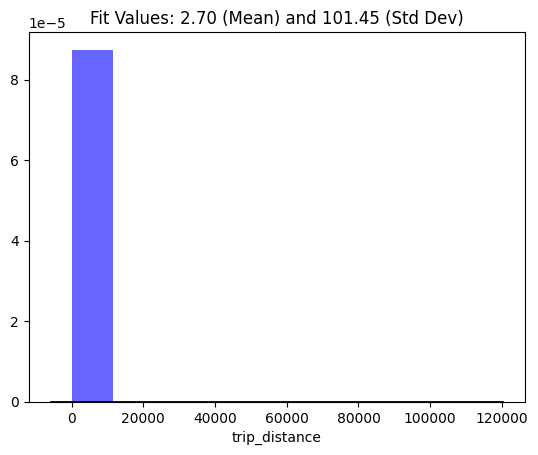

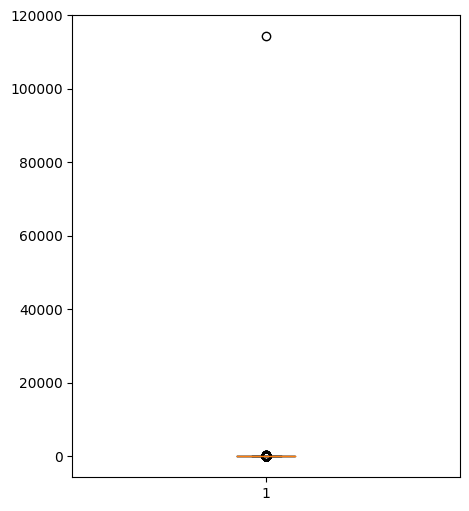

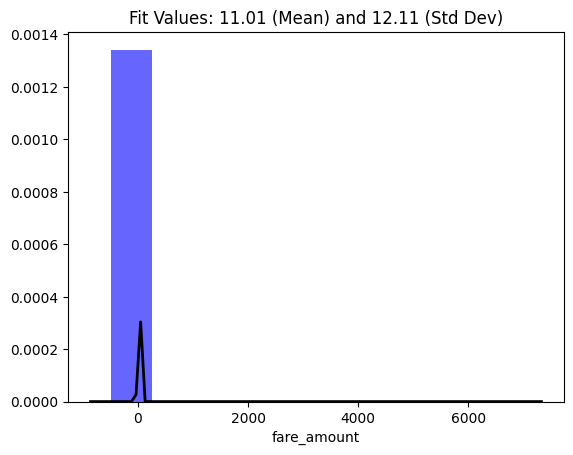

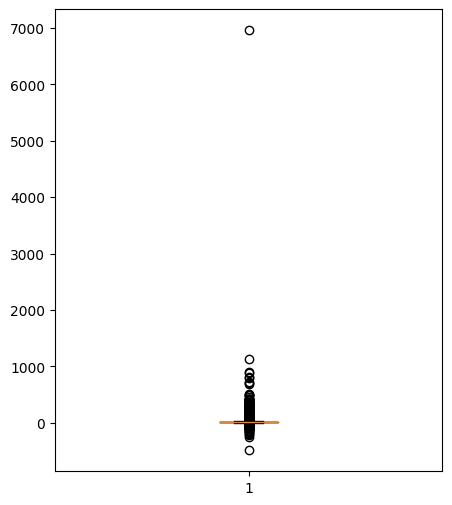

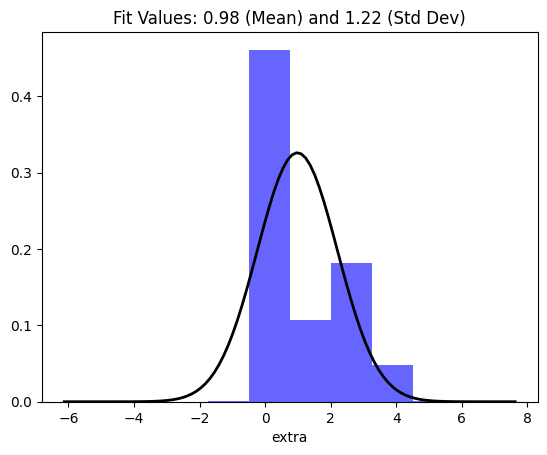

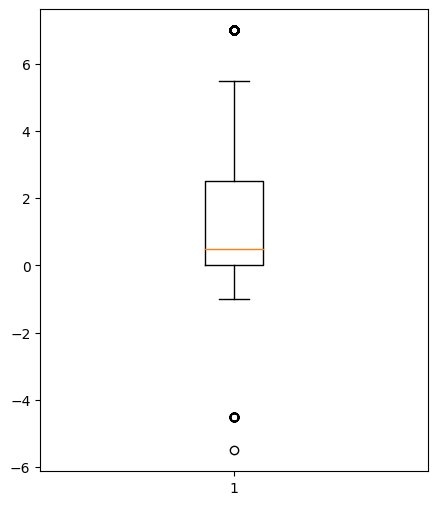

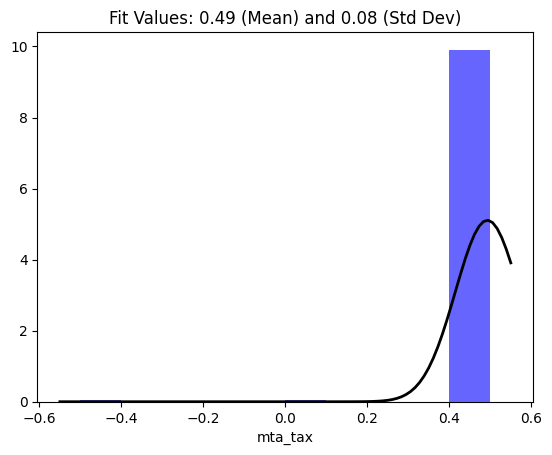

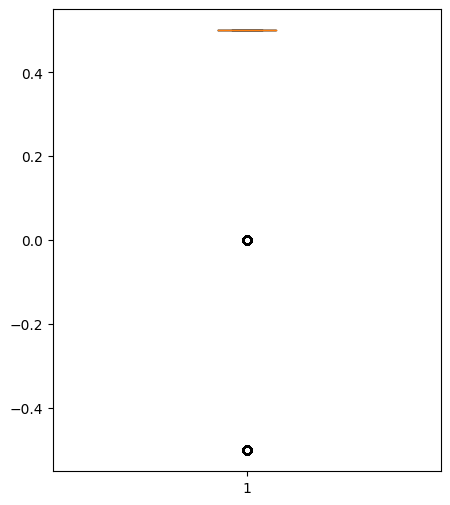

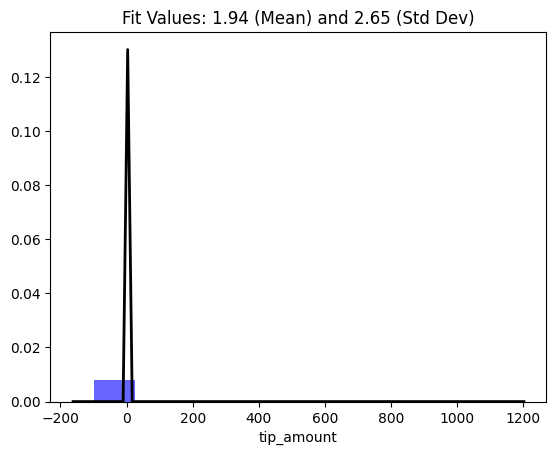

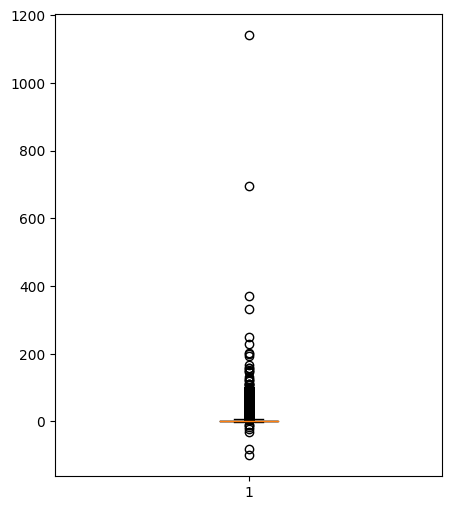

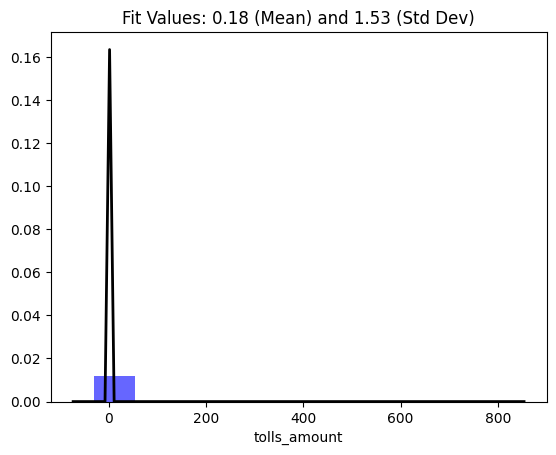

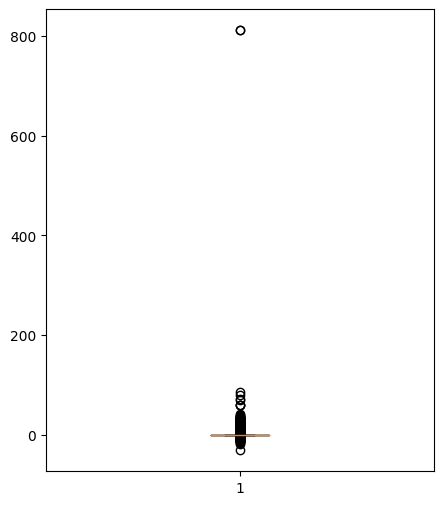

In [ ]:
import matplotlib.pyplot as plt 
from scipy.stats import norm

for i in ['trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount']:
    # Fit a normal distribution to the data; mean and standard deviation
    mu, std = norm.fit(df_n[i]) 
    
    plt.hist(df_n[i], density=True, alpha=0.6, color='b') # plotting histogram 
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit Values: {:.2f} (Mean) and {:.2f} (Std Dev)".format(mu, std)
    plt.title(title)
    plt.xlabel(i)
    
    fig = plt.figure(figsize =(5, 6))
    plt.boxplot(df_n[i]) # Creating Box plot
    
    plt.show()

<Axes: >

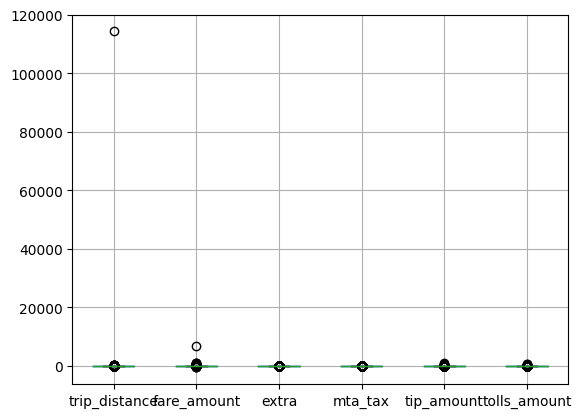

In [154]:
df_n.boxplot(column= ['trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount'])  

In [ ]:
df_n.nlargest(10, ['trip_distance'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,tripId,improvement_surcharge,congestion_surcharge,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time
1243982,VeriFone Inc.,2021-01-31 06:54:06,2021-01-31 07:16:38,1.0,114328.2,Negotiated fare,N,78,107,Cash,...,0.5,0.00,6.12,141909663301,0.3,0.0,2021-01-31,06:54:06,2021-01-31,07:16:38
764800,"Creative Mobile Technologies, LLC",2021-01-20 11:22:05,2021-01-20 19:47:56,1.0,427.7,Standard rate,Y,4,265,Credit card,...,0.5,1140.44,20.16,724435950946,0.3,2.5,2021-01-20,11:22:05,2021-01-20,19:47:56
427813,"Creative Mobile Technologies, LLC",2021-01-12 12:57:36,2021-01-12 21:37:34,0.0,326.1,Standard rate,N,234,39,Credit card,...,0.5,192.61,80.74,168394919506,0.3,2.5,2021-01-12,12:57:36,2021-01-12,21:37:34
166454,"Creative Mobile Technologies, LLC",2021-01-06 07:27:55,2021-01-06 17:44:31,1.0,271.4,Standard rate,N,229,39,Credit card,...,0.5,0.00,60.74,980034984983,0.3,2.5,2021-01-06,07:27:55,2021-01-06,17:44:31
993804,"Creative Mobile Technologies, LLC",2021-01-25 15:20:12,2021-01-25 21:21:13,1.0,270.2,Standard rate,N,186,265,Dispute,...,0.5,0.00,23.50,337950103632,0.3,2.5,2021-01-25,15:20:12,2021-01-25,21:21:13
60606,"Creative Mobile Technologies, LLC",2021-01-03 11:36:52,2021-01-03 18:30:59,1.0,267.7,Standard rate,N,148,4,Credit card,...,0.5,369.40,27.50,116031760255,0.3,2.5,2021-01-03,11:36:52,2021-01-03,18:30:59
718036,"Creative Mobile Technologies, LLC",2021-01-19 11:38:47,2021-01-19 19:34:16,1.0,260.5,Standard rate,N,4,4,Credit card,...,0.5,149.03,19.87,264473260124,0.3,2.5,2021-01-19,11:38:47,2021-01-19,19:34:16
58340,VeriFone Inc.,2021-01-03 09:01:26,2021-01-03 12:45:11,1.0,216.0,Negotiated fare,N,10,265,Credit card,...,0.0,20.00,12.24,767149917038,0.3,0.0,2021-01-03,09:01:26,2021-01-03,12:45:11
119629,VeriFone Inc.,2021-01-04 22:46:38,2021-01-05 02:16:36,1.0,167.1,Standard rate,N,48,265,Cash,...,0.5,0.00,0.00,542969314842,0.3,2.5,2021-01-04,22:46:38,2021-01-05,02:16:36
692071,"Creative Mobile Technologies, LLC",2021-01-18 16:58:52,2021-01-18 21:02:32,2.0,153.1,Standard rate,N,4,4,Credit card,...,0.5,87.31,13.75,374183843572,0.3,2.5,2021-01-18,16:58:52,2021-01-18,21:02:32


In [ ]:
df_n.nlargest(10, ['fare_amount'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,tripId,improvement_surcharge,congestion_surcharge,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time
108758,VeriFone Inc.,2021-01-04 16:04:51,2021-01-04 16:15:01,1.0,2.0,Standard rate,N,140,236,Credit card,...,0.5,696.48,0.00,687192236323,0.3,2.5,2021-01-04,16:04:51,2021-01-04,16:15:01
764800,"Creative Mobile Technologies, LLC",2021-01-20 11:22:05,2021-01-20 19:47:56,1.0,427.7,Standard rate,Y,4,265,Credit card,...,0.5,1140.44,20.16,724435950946,0.3,2.5,2021-01-20,11:22:05,2021-01-20,19:47:56
361530,"Creative Mobile Technologies, LLC",2021-01-10 18:51:32,2021-01-10 18:53:57,1.0,0.0,Negotiated fare,N,231,231,Credit card,...,0.0,0.05,0.00,183551370093,0.3,0.0,2021-01-10,18:51:32,2021-01-10,18:53:57
427813,"Creative Mobile Technologies, LLC",2021-01-12 12:57:36,2021-01-12 21:37:34,0.0,326.1,Standard rate,N,234,39,Credit card,...,0.5,192.61,80.74,168394919506,0.3,2.5,2021-01-12,12:57:36,2021-01-12,21:37:34
166454,"Creative Mobile Technologies, LLC",2021-01-06 07:27:55,2021-01-06 17:44:31,1.0,271.4,Standard rate,N,229,39,Credit card,...,0.5,0.00,60.74,980034984983,0.3,2.5,2021-01-06,07:27:55,2021-01-06,17:44:31
58340,VeriFone Inc.,2021-01-03 09:01:26,2021-01-03 12:45:11,1.0,216.0,Negotiated fare,N,10,265,Credit card,...,0.0,20.00,12.24,767149917038,0.3,0.0,2021-01-03,09:01:26,2021-01-03,12:45:11
718036,"Creative Mobile Technologies, LLC",2021-01-19 11:38:47,2021-01-19 19:34:16,1.0,260.5,Standard rate,N,4,4,Credit card,...,0.5,149.03,19.87,264473260124,0.3,2.5,2021-01-19,11:38:47,2021-01-19,19:34:16
60606,"Creative Mobile Technologies, LLC",2021-01-03 11:36:52,2021-01-03 18:30:59,1.0,267.7,Standard rate,N,148,4,Credit card,...,0.5,369.40,27.50,116031760255,0.3,2.5,2021-01-03,11:36:52,2021-01-03,18:30:59
993804,"Creative Mobile Technologies, LLC",2021-01-25 15:20:12,2021-01-25 21:21:13,1.0,270.2,Standard rate,N,186,265,Dispute,...,0.5,0.00,23.50,337950103632,0.3,2.5,2021-01-25,15:20:12,2021-01-25,21:21:13
368229,"Creative Mobile Technologies, LLC",2021-01-11 01:52:50,2021-01-11 01:53:58,0.0,0.0,Negotiated fare,N,265,265,Credit card,...,0.0,100.05,0.00,519677629343,0.3,0.0,2021-01-11,01:52:50,2021-01-11,01:53:58


As per the Top 10 values of `trip_distance` & `fare_amount`, we can set the max limit as 1000.  

<Axes: >

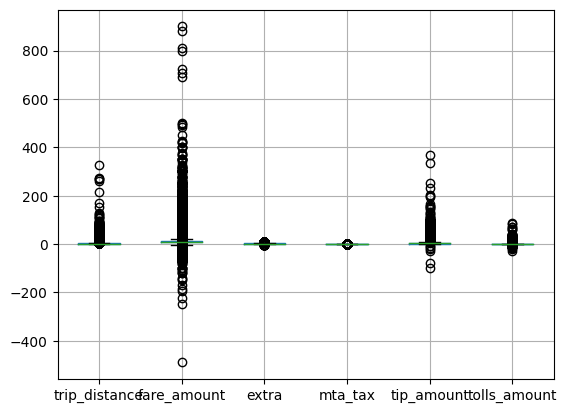

In [155]:
ab= df_n

df2 = ab.loc[ab["trip_distance"] < 1000 ]
df3= df2.loc[df2["tolls_amount"] < 200 ]
final_df = df3.loc[df3["fare_amount"] < 1000 ]
final_df.boxplot(column= ['trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount'])  

In [156]:
final_df.shape

(1271372, 22)

## However, we can perform the below function to remove the outliers in a specific Quartile Range but this will result in the loss of some essential data records. Therefore, we decided not to use any Quartile Range here.  
### So, the columns that can have the outliers are `trip_distance`, `fare_amount`, `tip_amount`, `tolls_amount`, `extra`, & `mta_tax`. So, we can remove the outliers in these columns using the function below.

In [ ]:
threshold = 0.1  # This number is a hyper parameter, by reducing it, more points are removed.
            
ApplicantIncome_out = df_n['trip_distance']

q25, q75 = np.percentile(ApplicantIncome_out, 25), np.percentile(ApplicantIncome_out, 75) # Q25, Q75

print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in ApplicantIncome_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = df_n
print('\nlen loan_num before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['trip_distance'] > upper) | (data_outliers['trip_distance'] < lower)].index)

print('len loan_num after dropping the outliers', len(data_outliers))

In [136]:
cd= df_n
def cap_data(cd):
    for col in ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount']:
        print("capping the ",col)
        if (((cd[col].dtype)=='float64') | ((cd[col].dtype)=='int64')):
            percentiles = cd[col].quantile([0.1,0.9]).values
            cd[col][cd[col] <= percentiles[0]] = percentiles[0]
            cd[col][cd[col] >= percentiles[1]] = percentiles[1]
        else:
            cd[col]=cd[col]
    return cd

fin_df=cap_data(cd)

capping the  trip_distance
capping the  fare_amount
capping the  tip_amount
capping the  tolls_amount


<Axes: >

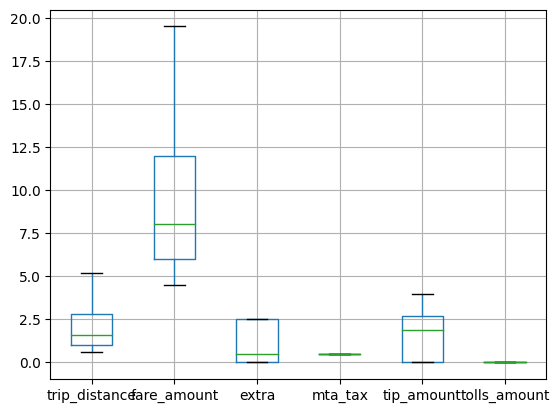

In [95]:
fin_df.boxplot(column= ['trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount'])  

# Data Analysis  
### • Average tip received by a vendor during the day  
### • Which time of the day is the busiest?  
### • Clean the Data and fix any anomalies  
### • Classify trips based on Payment Type (not the number in the excel sheet but the actual payment type. Use metadata table for reference)  
### • Is there any relationship between congestion surcharge and trip distance?  

### • Average tip received by a vendor during the day  
It depends on the `dropoff time` as driver gets the tip during `dropoff time`.

In [ ]:
final_df['VendorID'].unique()

array(['Creative Mobile Technologies, LLC', 'VeriFone Inc.'], dtype=object)

In [ ]:
final_df['tpep_pickup_datetime'][0]

'2021-01-01 00:30:10'

In [113]:
CreativeMobile= final_df.loc[final_df['VendorID'] == "Creative Mobile Technologies, LLC"]
VeriFone= final_df.loc[final_df['VendorID'] == "VeriFone Inc."]

In [51]:
CreativeMobile.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,tripId,improvement_surcharge,congestion_surcharge,tpep_pickup_date,tpep_pickup_time,tpep_dropoff_date,tpep_dropoff_time
0,"Creative Mobile Technologies, LLC",2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,Standard rate,N,142,43,Cash,...,0.5,0.00,0.0,559893529209,0.3,2.5,2021-01-01,00:30:10,2021-01-01,00:36:12
1,"Creative Mobile Technologies, LLC",2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,Standard rate,N,238,151,Cash,...,0.5,0.00,0.0,993405808080,0.3,0.0,2021-01-01,00:51:20,2021-01-01,00:52:19
2,"Creative Mobile Technologies, LLC",2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,Standard rate,N,132,165,Credit card,...,0.5,8.65,0.0,267031741304,0.3,0.0,2021-01-01,00:43:30,2021-01-01,01:11:06
3,"Creative Mobile Technologies, LLC",2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,Standard rate,N,138,132,Credit card,...,0.5,6.05,0.0,355132875433,0.3,0.0,2021-01-01,00:15:48,2021-01-01,00:31:01
5,"Creative Mobile Technologies, LLC",2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.6,Standard rate,N,224,68,Credit card,...,0.5,2.35,0.0,796431455521,0.3,2.5,2021-01-01,00:16:29,2021-01-01,00:24:30


In [ ]:
CreativeMobile.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'tripId',
       'improvement_surcharge', 'congestion_surcharge', 'tpep_pickup_date',
       'tpep_pickup_time', 'tpep_dropoff_date', 'tpep_dropoff_time'],
      dtype='object')

In [114]:
CreativeMobile_tip_sum= CreativeMobile.groupby('tpep_dropoff_date')['tip_amount'].sum()
CreativeMobile_tip_sum

tpep_dropoff_date
2020-10-13        1.00
2021-01-01    13092.94
2021-01-02    19779.27
2021-01-03    17633.73
2021-01-04    25191.10
2021-01-05    25459.00
2021-01-06    26619.91
2021-01-07    27448.13
2021-01-08    26985.22
2021-01-09    21993.13
2021-01-10    17630.93
2021-01-11    25432.70
2021-01-12    26701.45
2021-01-13    27173.42
2021-01-14    28776.11
2021-01-15    29040.25
2021-01-16    21466.11
2021-01-17    18881.94
2021-01-18    21666.73
2021-01-19    28250.59
2021-01-20    28139.82
2021-01-21    31073.80
2021-01-22    30927.67
2021-01-23    23483.02
2021-01-24    18385.46
2021-01-25    26343.47
2021-01-26    26629.18
2021-01-27    30292.60
2021-01-28    31832.50
2021-01-29    30864.59
2021-01-30    21434.86
2021-01-31    17989.56
2021-02-01      203.54
Name: tip_amount, dtype: float64

In [115]:
type(CreativeMobile_tip_sum)

pandas.core.series.Series

In [116]:
CreativeMobile_tip_sum.sum()

766823.73

In [117]:
print(len(CreativeMobile_tip_sum))

33


In [118]:
CreativeMobile_day_avg = CreativeMobile_tip_sum.sum()/ len(CreativeMobile_tip_sum)
print("The Average tip received by CreativeMobile vendor during the day is {}".format(CreativeMobile_day_avg.round(2)))

The Average tip received by CreativeMobile vendor during the day is 23237.08


Repeating the same code for `VeriFone` vendor

In [119]:
VeriFone_tip_sum= VeriFone.groupby('tpep_dropoff_date')['tip_amount'].sum()
#VeriFone_tip_sum

VeriFone_day_avg = VeriFone_tip_sum.sum()/ len(VeriFone_tip_sum)
print("The Average tip received by VeriFone vendor during the day is {}".format(VeriFone_day_avg.round(2)))

The Average tip received by VeriFone vendor during the day is 47136.57


In [120]:
Vendor_tip_sum= final_df.groupby('tpep_dropoff_date')['tip_amount'].sum()
#Vendor_tip_sum

Vendor_day_avg = Vendor_tip_sum.sum()/ len(Vendor_tip_sum)
print("The Average tip received by any vendor during the day is {}".format(Vendor_day_avg.round(2)))

The Average tip received by any vendor during the day is 66587.57


### • Which time of the day is the busiest?  
This time depends on the `pickup time`

In [55]:
final_df['tpep_pickup_time'][0][:2]

'00'

15    106414
14    105010
16    100348
17     98862
13     96269
12     90722
18     89981
11     82348
10     75527
09     68220
19     67337
08     63126
20     45854
07     41312
21     35781
22     29724
06     21712
23     18215
00     11491
01      7494
05      6455
02      4274
03      2466
04      2432
Name: tpep_pickup_hour, dtype: int64


Text(0, 0.5, 'Trips count')

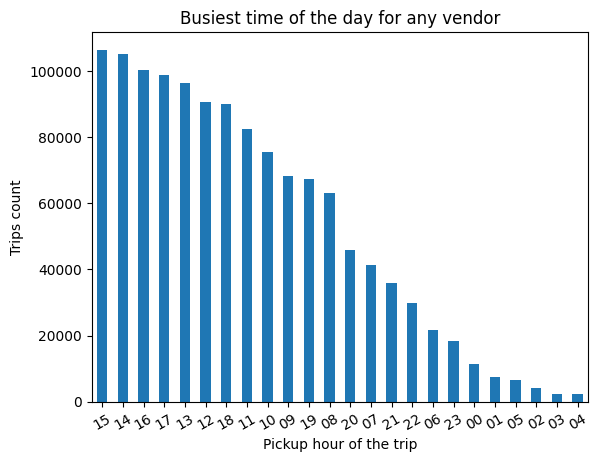

In [121]:
pickup_hour=[]

for i in final_df['tpep_pickup_time']:
  pickup_hour.append(i[:2]) 
    
#pickup_hour

final_df['tpep_pickup_hour']= pickup_hour


xy= final_df['tpep_pickup_hour'].value_counts()
print(xy)

xy.plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Busiest time of the day for any vendor")
plt.xlabel("Pickup hour of the trip")
plt.ylabel("Trips count")

15    34839
14    34393
16    32811
17    32401
13    31280
18    28953
12    28933
11    26372
10    23898
19    21566
09    21425
08    19883
20    14823
07    13490
21    11614
22     9754
06     7045
23     5875
00     3825
01     2498
05     2140
02     1369
04      809
03      747
Name: tpep_pickup_hour, dtype: int64


Text(0, 0.5, 'Trips count')

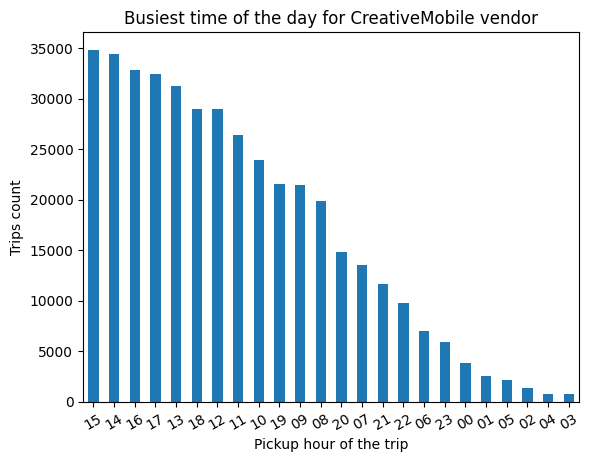

In [53]:
pickup_hour=[]

for i in CreativeMobile['tpep_pickup_time']:
  pickup_hour.append(i[:2]) 
    
#pickup_hour

CreativeMobile['tpep_pickup_hour']= pickup_hour


xy= CreativeMobile['tpep_pickup_hour'].value_counts()
print(xy)

xy.plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Busiest time of the day for CreativeMobile vendor")
plt.xlabel("Pickup hour of the trip")
plt.ylabel("Trips count")

15    71575
14    70617
16    67537
17    66461
13    64989
12    61789
18    61028
11    55976
10    51629
09    46795
19    45771
08    43243
20    31031
07    27822
21    24167
22    19970
06    14667
23    12340
00     7666
01     4996
05     4315
02     2905
03     1719
04     1623
Name: tpep_pickup_hour, dtype: int64


Text(0, 0.5, 'Trips count')

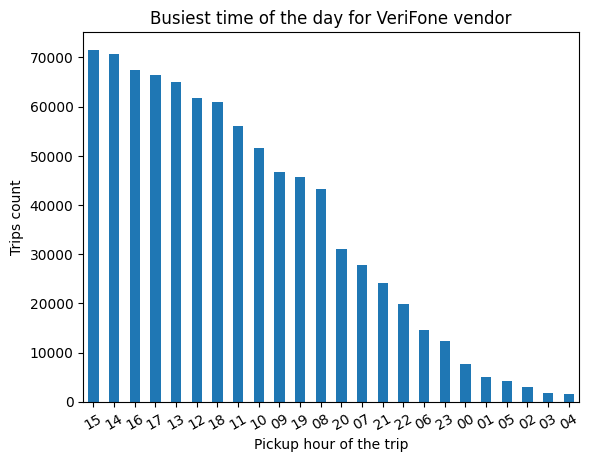

In [54]:
pickup_hour=[]

for i in VeriFone['tpep_pickup_time']:
  pickup_hour.append(i[:2]) 
    
#pickup_hour

VeriFone['tpep_pickup_hour']= pickup_hour


xy= VeriFone['tpep_pickup_hour'].value_counts()
print(xy)

xy.plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Busiest time of the day for VeriFone vendor")
plt.xlabel("Pickup hour of the trip")
plt.ylabel("Trips count")

### • Classify trips based on Payment Type (not the number in the excel sheet but the actual payment type. Use metadata table for reference). 

In `payment_type` replace digits by name of actual `payment_type`.

Credit card    934473
Cash           322889
Unknown         49238
Voided trip     49114
No charge        8384
Dispute          5667
Name: payment_type, dtype: int64


Text(0, 0.5, 'Trips count')

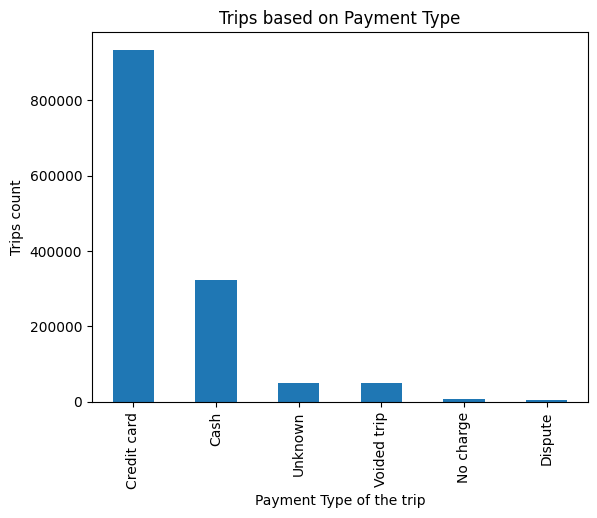

In [122]:
ab= df['payment_type'].value_counts()
print(ab)

ab.plot(kind="bar", title="test")
plt.title("Trips based on Payment Type")
plt.xlabel("Payment Type of the trip")
plt.ylabel("Trips count")

Credit card    934462
Cash           322865
No charge        8380
Dispute          5667
Name: payment_type, dtype: int64


Text(0, 0.5, 'Trips count')

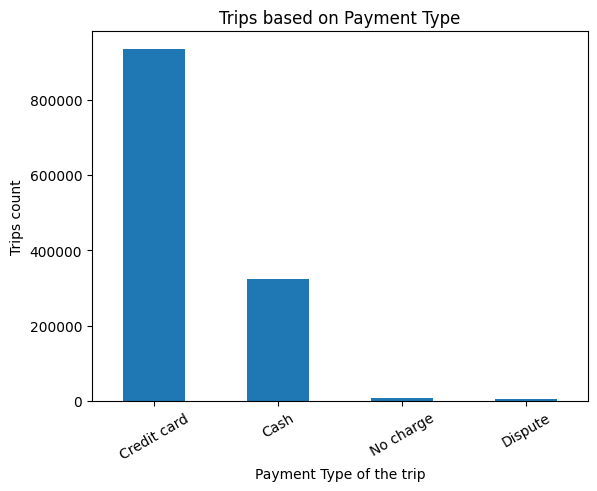

In [123]:
ab= final_df['payment_type'].value_counts()
print(ab)

ab.plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Trips based on Payment Type")
plt.xlabel("Payment Type of the trip")
plt.ylabel("Trips count")

Text(0.5, 1.0, 'Trips based on Payment Type')

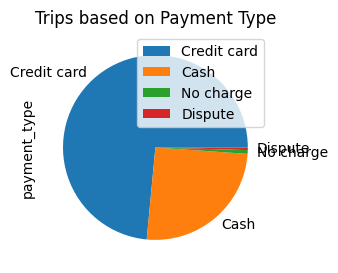

In [125]:
from matplotlib import legend
final_df['payment_type'].value_counts().plot(kind='pie',figsize=(4,3), legend= {'n','h','y','i'})
plt.title("Trips based on Payment Type")


### • Relationship between congestion surcharge and trip distance

In [ ]:
final_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'tripId',
       'improvement_surcharge', 'congestion_surcharge'],
      dtype='object')

In [126]:
final_df['congestion_surcharge'].unique()

array([ 2.5 ,  0.  , -2.5 ,  0.75,  3.  ])

<Axes: xlabel='congestion_surcharge', ylabel='trip_distance'>

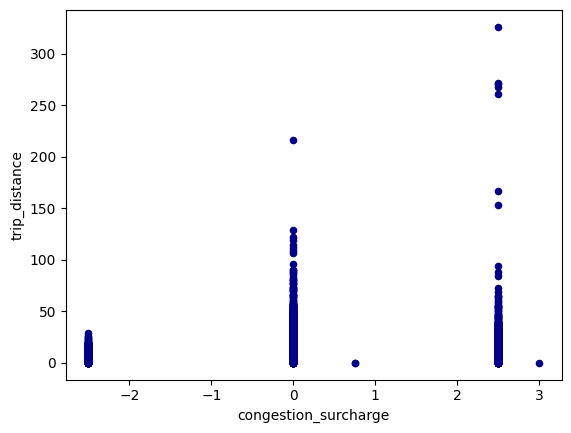

In [127]:
final_df.plot.scatter(x='congestion_surcharge', y='trip_distance', c='DarkBlue')

## Majority of the `trip_distance` have been assigned a `congestion_surcharge` of 0. and 2.5

In [128]:
final_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'tripId',
       'improvement_surcharge', 'congestion_surcharge', 'tpep_pickup_date',
       'tpep_pickup_time', 'tpep_dropoff_date', 'tpep_dropoff_time',
       'tpep_pickup_hour'],
      dtype='object')

# Miscellaneous Analysis:  
## * Relation between `passenger_count` and `trip_distance`  
## * Relation between `payment_type` and `store_and_fwd_flag`  
## * Relation between `RatecodeID` and `store_and_fwd_flag`  
## * Relation between `tolls_amount` and `trip_distance`  

<Axes: xlabel='passenger_count', ylabel='trip_distance'>

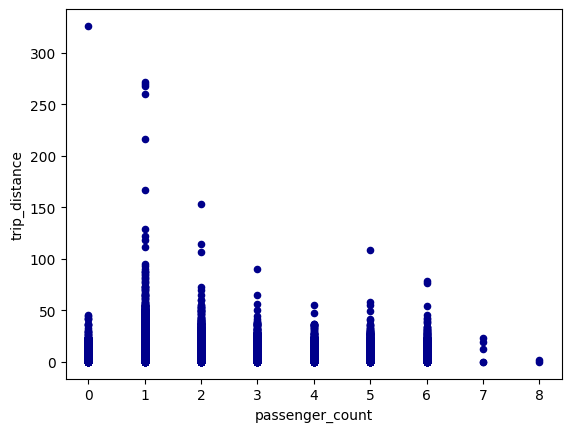

In [129]:
final_df.plot.scatter(x='passenger_count', y='trip_distance', c='DarkBlue')

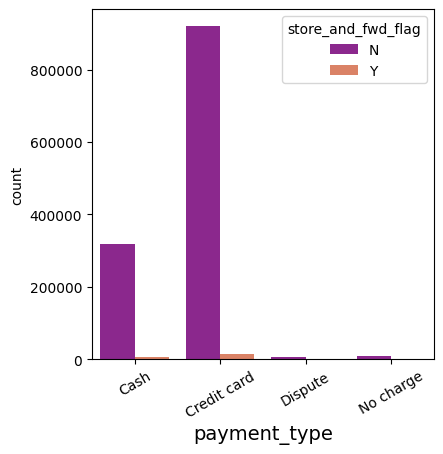

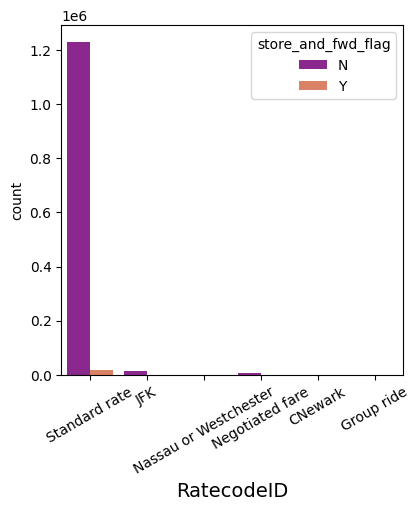

In [132]:
for i in ['payment_type','RatecodeID']: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='store_and_fwd_flag', data=final_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)
    plt.xticks(rotation=30, horizontalalignment="center")

<Axes: xlabel='tolls_amount', ylabel='trip_distance'>

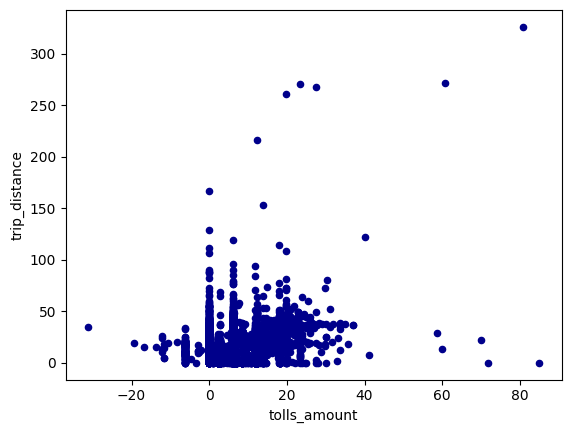

In [174]:
final_df.plot.scatter(x='tolls_amount', y='trip_distance', c='DarkBlue')

<Axes: xlabel='tolls_amount', ylabel='trip_distance'>

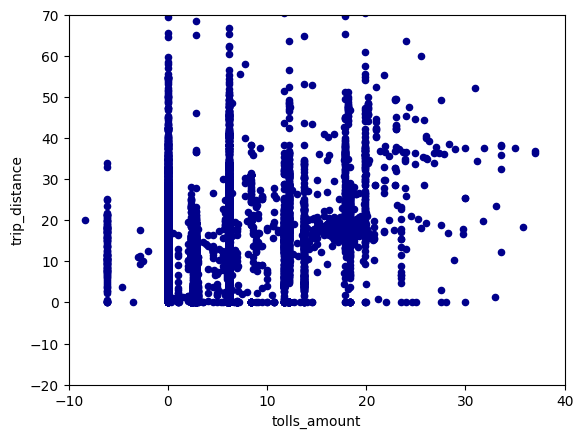

In [175]:
final_df.plot.scatter(x='tolls_amount', y='trip_distance', c='DarkBlue', xlim= (-10,40), ylim= (-20,70))

We can see a positive linear correlation between `tolls_amount` and `trip_distance` as when the `trip_distance` increases upto a period then the `tolls_amount` also increases.  

<Axes: xlabel='tolls_amount', ylabel='fare_amount'>

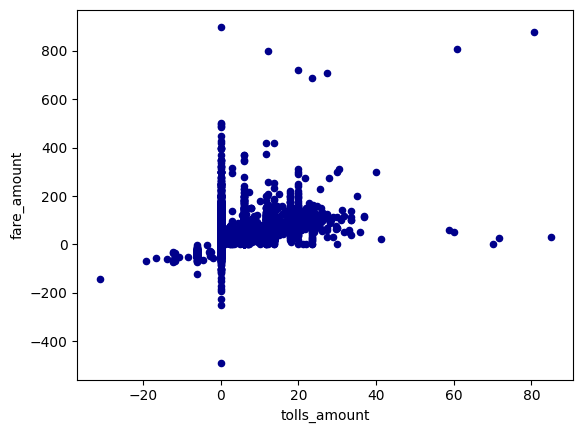

In [167]:
final_df.plot.scatter(x='tolls_amount', y='fare_amount', c='DarkBlue')

<Axes: xlabel='tolls_amount', ylabel='fare_amount'>

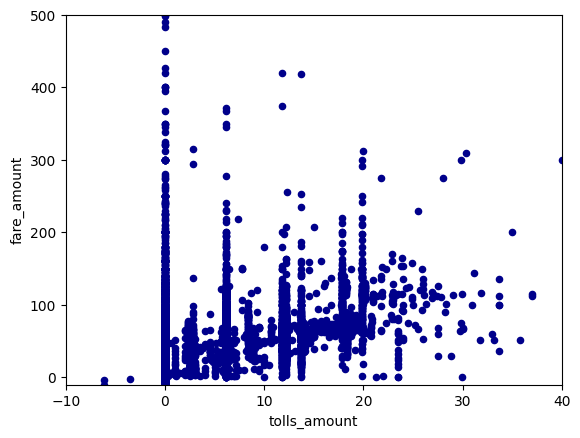

In [176]:
final_df.plot.scatter(x='tolls_amount', y='fare_amount', c='DarkBlue', xlim= (-10,40), ylim= (-10,500))

We can see a positive linear correlation between `tolls_amount` and `fare_amount` as when the `fare_amount` increases upto a period then the `tolls_amount` also increases.  

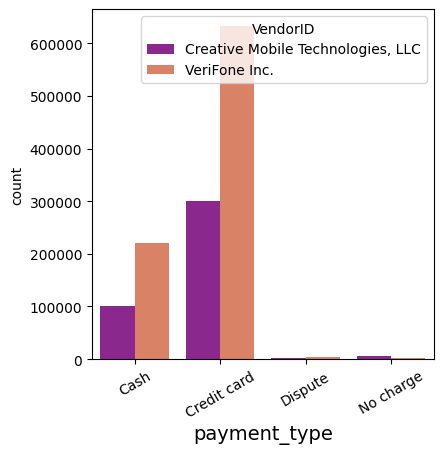

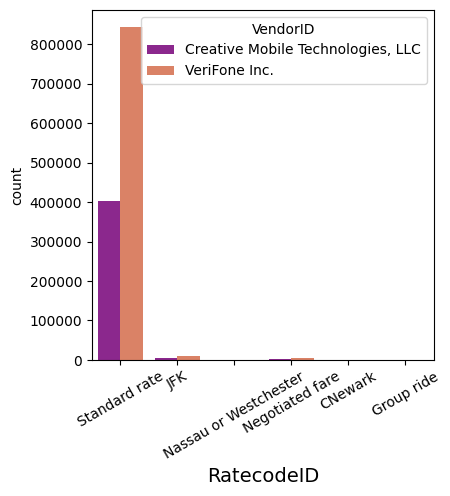

In [165]:
for i in ['payment_type','RatecodeID']: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='VendorID', data=final_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)
    plt.xticks(rotation=30, horizontalalignment="center")

Standard rate            1249236
JFK                        14858
Negotiated fare             5210
Nassau or Westchester       1202
CNewark                      856
Group ride                    10
Name: RatecodeID, dtype: int64


Text(0, 0.5, 'Trips count')

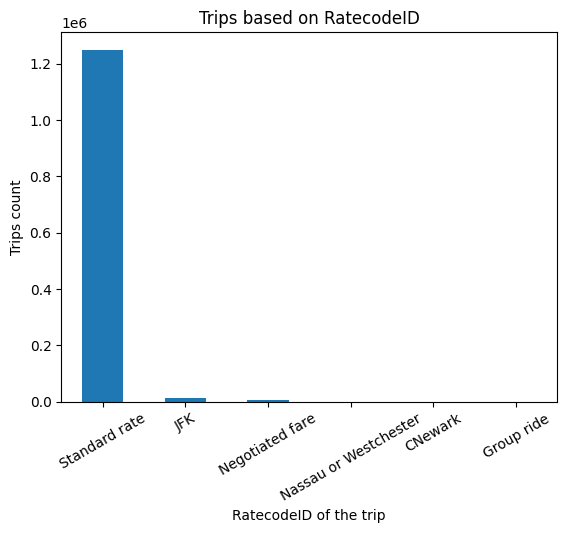

In [166]:
ab= final_df['RatecodeID'].value_counts()
print(ab)

ab.plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Trips based on RatecodeID")
plt.xlabel("RatecodeID of the trip")
plt.ylabel("Trips count")